<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/gnb_tb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd # UNTUK MEMANIPULASI DATA (MEMBACA DATA CSV)
import numpy as np # UNTUK MANUPULASI DATA (MENGUBAH LIST MENJADI ARRAY)
import missingno as msno #MENGIDENTIFIKASI DATA BERNILAI NULL
import seaborn as sns #MENAMPILKAN GRAFIK
import matplotlib.pyplot as plt #MENAMPILKAN GRAFIK

from sklearn.model_selection import train_test_split # UNTUK MEMISAHKAN ANTARA DATA TEST DAN DATA TRAINING
from sklearn.metrics import classification_report # UNTUK MELAKUKAN EVALUASI MODEL MATRIKS
from sklearn import tree # UNTUK MODEL DECISION TREE

import plotly.express as px  # UNTUK VISUALISASI DATA
import plotly.graph_objects as go # UNTUK VISUALISASI DATA
import graphviz # UNTUK PLOT DESICION TREE
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, confusion_matrix # UNTUK MELAKUKAN EVALUASI MODEL MATRIKS

In [ ]:
#IMPORT DATASET DAN MENAMPILKAN DATASET
dataset = pd.read_csv('data.csv')
dataset

,no,nama_lengkap,jenis_kelamin,kelurahan,penghasilan,jumlah_penghuni,kondisi_dinding,kondisi_lantai,kondisi_atap,status_penerimaan
0,1,Budy Hartono Santosa,Laki-laki,Aia Bangih,5570000,8,Rusak Sedang,Rusak Berat,Rusak Sangat Ringan,Tidak
1,2,Eddi Sugiardi,Laki-laki,Aia Bangih,6920000,1,Rusak Berat,Rusak Berat,Rusak Berat,Ya
2,3,Efrem Wardhana,Laki-laki,Aia Bangih,9460000,9,Rusak Ringan,Rusak Sedang,Rusak Sangat Berat,Tidak
3,4,Eko Prasetyo Ang,Laki-laki,Aia Bangih,880000,8,Rusak Ringan,Rusak Sedang,Rusak Sangat Berat,Tidak
4,5,Evan,Laki-laki,Aia Bangih,4770000,12,Rusak Sangat Ringan,Rusak Ringan,Rusak Sangat Ringan,Tidak
...,...,...,...,...,...,...,...,...,...,...
295,296,Katharina Wihardja,Perempuan,Ujung Gading,3740000,11,Rusak Sangat Ringan,Rusak Ringan,Rusak Sangat Ringan,Tidak
296,297,Mohamad Noer,Laki-laki,Ujung Gading,2110000,9,Rusak Sedang,Rusak Berat,Rusak Sangat Berat,Tidak
297,298,Mohammad Hidayat Hasan,Laki-laki,Ujung Gading,4190000,4,Rusak Sedang,Rusak Berat,Rusak Sangat Ringan,Tidak
298,299,Wahjudin Judiana Ardiwinata,Laki-laki,Ujung Gading,5020000,12,Rusak Sangat Berat,Rusak Berat,Rusak Sangat Berat,Ya


In [ ]:
#MENGHITUNG UKURAN DATASET
dataset.shape

(300, 10)

In [ ]:
#MELIHAT INFO DATASET
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   no                 300 non-null    int64 
 1   nama_lengkap       300 non-null    object
 2   jenis_kelamin      300 non-null    object
 3   kelurahan          300 non-null    object
 4   penghasilan        300 non-null    int64 
 5   jumlah_penghuni    300 non-null    int64 
 6   kondisi_dinding    300 non-null    object
 7   kondisi_lantai     300 non-null    object
 8   kondisi_atap       300 non-null    object
 9   status_penerimaan  300 non-null    object
dtypes: int64(3), object(7)
memory usage: 23.6+ KB


In [ ]:
#MELIHAT DESKRIPSI DATASET NUMERIK
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
no,300.0,1.505000e+02,8.674676e+01,1.0,75.75,150.5,225.25,300.0
penghasilan,300.0,5.234300e+06,2.939495e+06,70000.0,2545000.00,5340000.0,7815000.00,9920000.0
jumlah_penghuni,300.0,6.446667e+00,3.494930e+00,1.0,4.00,6.0,9.00,12.0


In [ ]:
#MELIHAT DESKRIPSI DATASET NON NUMERIK
dataset.describe(exclude=['float64','int64']).T

,count,unique,top,freq
nama_lengkap,300,299,Mohamad Noer,2
jenis_kelamin,300,2,Laki-laki,225
kelurahan,300,19,Aua Kuniang,21
kondisi_dinding,300,5,Rusak Sedang,66
kondisi_lantai,300,3,Rusak Berat,177
kondisi_atap,300,5,Rusak Sangat Berat,69
status_penerimaan,300,2,Tidak,200


Total Jumlah Data Pengamatan: 300


no                   0
nama_lengkap         0
jenis_kelamin        0
kelurahan            0
penghasilan          0
jumlah_penghuni      0
kondisi_dinding      0
kondisi_lantai       0
kondisi_atap         0
status_penerimaan    0
dtype: int64

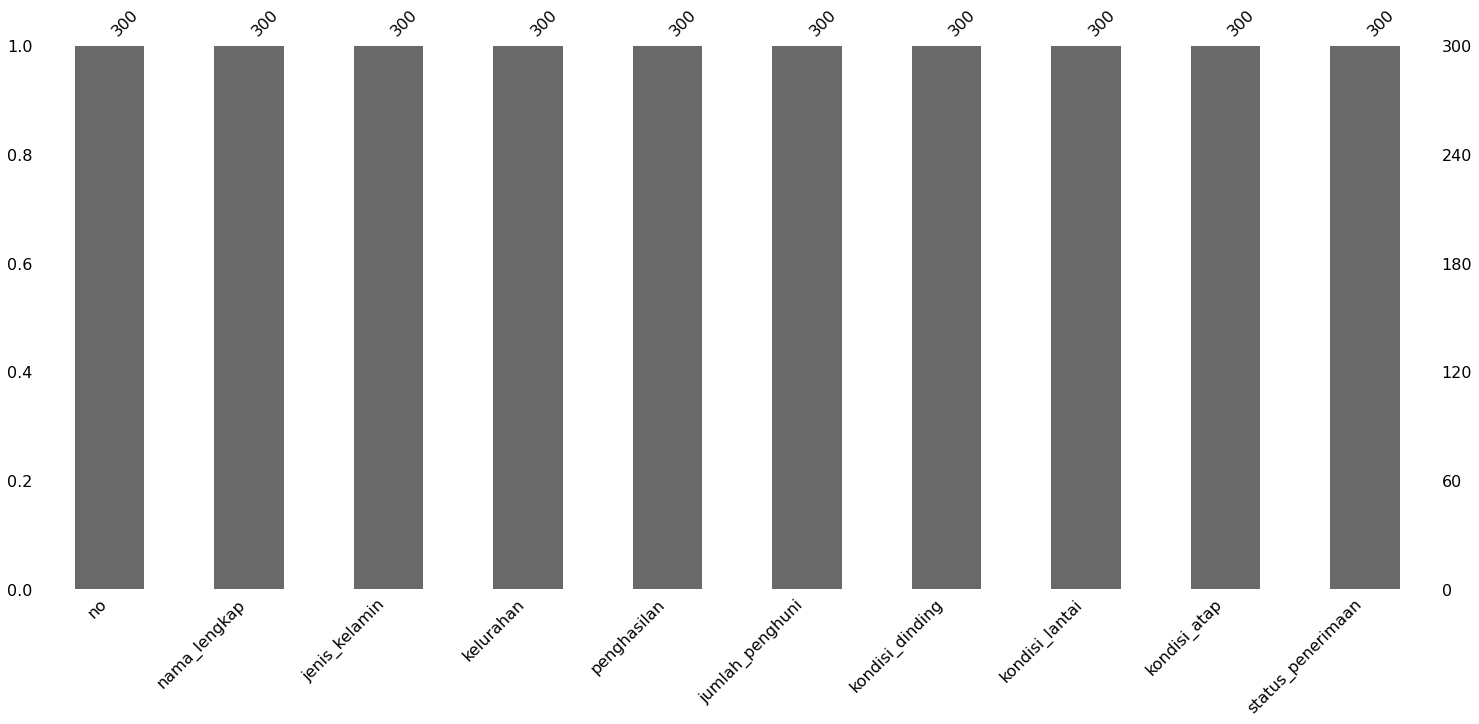

In [ ]:
#PENGECEKAN NILAI NULL
print ('Total Jumlah Data Pengamatan:', dataset.shape[0])
msno.bar(dataset)
dataset.isnull().sum()

In [ ]:
#MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN UNTUK ANALISIS
predata_hasil = dataset.drop(["no", "nama_lengkap", "jenis_kelamin", "kelurahan"], axis=1)

#MENAMPILKAN NAMA KOLOM YANG DIPERLUKAN
predata_hasil.columns

Index(['penghasilan', 'jumlah_penghuni', 'kondisi_dinding', 'kondisi_lantai',
       'kondisi_atap', 'status_penerimaan'],
      dtype='object')

In [ ]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA STATUS PENERIMAAN
def status_penerimaan(value1):
  if value1 == "Ya":
    return 1
  elif value1 == "Tidak":
    return 0

predata_hasil['status_penerimaan'] = predata_hasil['status_penerimaan'].apply(status_penerimaan)
display(predata_hasil['status_penerimaan'])

0      0
1      1
2      0
3      0
4      0
      ..
295    0
296    0
297    0
298    1
299    1
Name: status_penerimaan, Length: 300, dtype: int64

In [ ]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA PENGHASILAN
def penghasilan(value1):
  if value1 >= 0 and value1 <= 1000000:
    return 1
  elif value1 > 1000000 and value1 <= 2000000:
    return 2
  elif value1 > 2000000 and value1 <= 3000000:
    return 3
  elif value1 > 3000000 and value1 <= 4000000:
    return 4
  elif value1 > 4000000:
    return 5

predata_hasil['penghasilan'] = predata_hasil['penghasilan'].apply(penghasilan)
display(predata_hasil['penghasilan'])

0      5
1      5
2      5
3      1
4      5
      ..
295    4
296    3
297    5
298    5
299    5
Name: penghasilan, Length: 300, dtype: int64

In [ ]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA JUMLAH PENGHUNI
def jumlah_penghuni(value1):
  if value1 == 1:
    return 5
  elif value1 > 1  and value1 <= 3:
    return 4
  elif value1 > 3 and value1 <= 5:
    return 3
  elif value1 > 5 and value1 <= 7:
    return 2
  elif value1 >= 8:
    return 1

predata_hasil['jumlah_penghuni'] = predata_hasil['jumlah_penghuni'].apply(jumlah_penghuni)
display(predata_hasil['jumlah_penghuni'])

0      1
1      5
2      1
3      1
4      1
      ..
295    1
296    1
297    3
298    1
299    5
Name: jumlah_penghuni, Length: 300, dtype: int64

In [ ]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA KONDISI ATAP DAN KONDISI DINDING
def kondisi_atap_dinding(value1):
  if value1 == "Rusak Sangat Berat":
    return 5
  elif value1 == "Rusak Berat":
    return 4
  elif value1 == "Rusak Sedang":
    return 3
  elif value1 == "Rusak Ringan":
    return 2
  elif value1 == "Rusak Sangat Ringan":
    return 1

predata_hasil['kondisi_atap'] = predata_hasil['kondisi_atap'].apply(kondisi_atap_dinding)
display(predata_hasil['kondisi_atap'])

predata_hasil['kondisi_dinding'] = predata_hasil['kondisi_dinding'].apply(kondisi_atap_dinding)
display(predata_hasil['kondisi_dinding'])

0      1
1      4
2      5
3      5
4      1
      ..
295    1
296    5
297    1
298    5
299    4
Name: kondisi_atap, Length: 300, dtype: int64

0      3
1      4
2      2
3      2
4      1
      ..
295    1
296    3
297    3
298    5
299    2
Name: kondisi_dinding, Length: 300, dtype: int64

In [ ]:
#KONVERSI NILAI BERNILAI STRING KE NILAI ANGKA
#FUNGSI UBAH DATA KONDISI LANTAI
def kondisi_lantai(value1):
  if value1 == "Rusak Berat":
    return 5
  elif value1 == "Rusak Sedang":
    return 3
  elif value1 == "Rusak Ringan":
    return 1

predata_hasil['kondisi_lantai'] = predata_hasil['kondisi_lantai'].apply(kondisi_lantai)
display(predata_hasil['kondisi_lantai'])

0      5
1      5
2      3
3      3
4      1
      ..
295    1
296    5
297    5
298    5
299    3
Name: kondisi_lantai, Length: 300, dtype: int64

In [ ]:
#TAMPILAN DATASET SETELAH KONVERSI
predata_hasil

,penghasilan,jumlah_penghuni,kondisi_dinding,kondisi_lantai,kondisi_atap,status_penerimaan
0,5,1,3,5,1,0
1,5,5,4,5,4,1
2,5,1,2,3,5,0
3,1,1,2,3,5,0
4,5,1,1,1,1,0
...,...,...,...,...,...,...
295,4,1,1,1,1,0
296,3,1,3,5,5,0
297,5,3,3,5,1,0
298,5,1,5,5,5,1


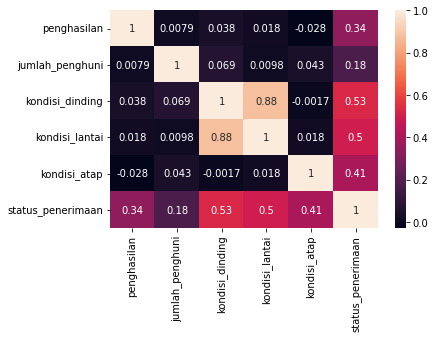

In [ ]:
#KORELASI ANTAR VARIABEL
sns.heatmap(predata_hasil.corr(), annot=True)

In [ ]:
#MENENTUKAN VARIABEL DEPENDEN DAN INDEPENDEN
x = predata_hasil[['penghasilan', 'jumlah_penghuni', 'kondisi_dinding', 'kondisi_atap', 'kondisi_lantai']]
y = predata_hasil['status_penerimaan']
print(x)
print(y)

     penghasilan  jumlah_penghuni  kondisi_dinding  kondisi_atap  \
0              5                1                3             1   
1              5                5                4             4   
2              5                1                2             5   
3              1                1                2             5   
4              5                1                1             1   
..           ...              ...              ...           ...   
295            4                1                1             1   
296            3                1                3             5   
297            5                3                3             1   
298            5                1                5             5   
299            5                5                2             4   

     kondisi_lantai  
0                 5  
1                 5  
2                 3  
3                 3  
4                 1  
..              ...  
295               1  
296    

In [ ]:
#MELAKUKAN TRAINING DATASET
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
modelnb.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Menentukan hasil prediksi dari x_test
y_pred = modelnb.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('R2 score untuk Naive Bayes ',r2_score(y,modelnb.predict(x)))
print('Mean Absolute Error untuk Naive Bayes ', mean_absolute_error(y, modelnb.predict(x)))
print('Mean Squared Error untuk Naive Bayes ', mean_squared_error(y,modelnb.predict(x)))
print('Root Mean Square error untuk Naive Bayes ',sqrt(mean_squared_error(y,modelnb.predict(x))))
print('Mean Absolute Percentage Error untuk Naive Bayes ', mean_absolute_percentage_error(y,modelnb.predict(x)))

R2 score untuk Naive Bayes  0.4
Mean Absolute Error untuk Naive Bayes  0.13333333333333333
Mean Squared Error untuk Naive Bayes  0.13333333333333333
Root Mean Square error untuk Naive Bayes  0.3651483716701107
Mean Absolute Percentage Error untuk Naive Bayes  495395959010754.56


In [ ]:
#MENENTUKAN PROBABILITAS HASIL PREDIKSI
modelnb.predict_proba(x_test)

array([[3.65241155e-01, 6.34758845e-01],
       [9.99999992e-01, 8.44438565e-09],
       [2.06890576e-02, 9.79310942e-01],
       [1.22175048e-02, 9.87782495e-01],
       [1.00000000e+00, 1.39551781e-36],
       [9.99999997e-01, 2.77022355e-09],
       [2.26980383e-01, 7.73019617e-01],
       [1.00000000e+00, 2.42635884e-17],
       [3.31284004e-02, 9.66871600e-01],
       [9.99999992e-01, 7.74209284e-09],
       [9.88314739e-03, 9.90116853e-01],
       [6.46991653e-02, 9.35300835e-01],
       [9.99999972e-01, 2.78588189e-08],
       [1.00000000e+00, 3.99963683e-43],
       [1.59512113e-02, 9.84048789e-01],
       [1.00000000e+00, 4.00251471e-10],
       [6.46991653e-02, 9.35300835e-01],
       [7.86236303e-03, 9.92137637e-01],
       [9.98783766e-01, 1.21623413e-03],
       [9.99999992e-01, 7.74209284e-09],
       [1.75699736e-01, 8.24300264e-01],
       [2.50687631e-01, 7.49312369e-01],
       [9.24264666e-01, 7.57353336e-02],
       [8.04287748e-01, 1.95712252e-01],
       [1.017441

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


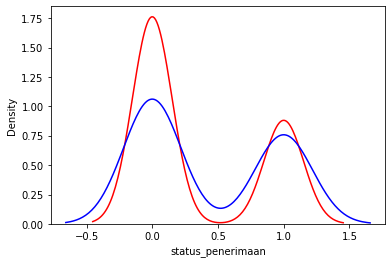

In [ ]:
#Membuat kurva perbandingan nilai aktual dan nilai prediksi model KNN
a = sns.distplot(predata_hasil['status_penerimaan'], hist=False, color='r', label='Nilai Aktual')
sns.distplot(y_pred, hist=False, color='b', label='Nilai Prediksi', ax=a)

In [ ]:
#MENAMPILKAN AKURASI
print(accuracy_score(y_test, y_pred))

0.8666666666666667


              precision    recall  f1-score   support

           0       0.91      0.86      0.89        37
           1       0.80      0.87      0.83        23

    accuracy                           0.87        60
   macro avg       0.86      0.87      0.86        60
weighted avg       0.87      0.87      0.87        60



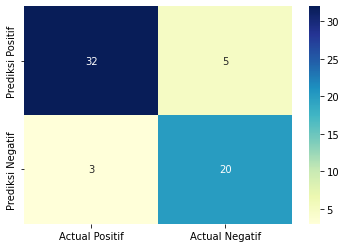

In [ ]:
#EVALUASI
print(classification_report(y_test, y_pred)) #MENAMPILKAN HASIL MATRIKS PREDIKSI

#MENAMPILKAN HASIL REPORT KLASIFIKASI
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positif', 'Actual Negatif'],
                                    index = ['Prediksi Positif', 'Prediksi Negatif'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [ ]:
#Membuat nilai probabilitas untuk digunakan pada evaluasi ROC
random_probs = [0 for _ in range(len(y_test))]
nb_probs = modelnb.predict(x_test)
nb_probs

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
#Menghitung nilai ROC dan AUCROC
random_auc = roc_auc_score(y_test, random_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('Naive Bayes = %.3f' % (nb_auc))

Random Prediction : AUCROC = 0.500
Naive Bayes = 0.867


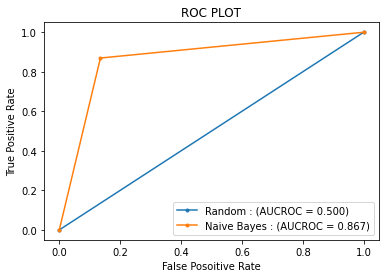

In [ ]:
#Membuat kurva dari ROC sebagai model evaluasi
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

plt.plot(random_fpr, random_tpr, marker=".", label = "Random : (AUCROC = %.3f)" % random_auc)
plt.plot(nb_fpr, nb_tpr, marker=".", label = "Naive Bayes : (AUCROC = %.3f)" % nb_auc)

plt.title("ROC PLOT")
plt.xlabel("False Posoitive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()